In [7]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [8]:
data = pd.read_csv('C:\\Users\\DELL\\Desktop\\diabetes2.csv')

In [11]:
data.head(10)  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
data.shape

(768, 9)

In [13]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
x = data[['Glucose', 'Age']].values
y = data['Outcome'].values

print(x.shape)
print(y.shape)

(768, 2)
(768,)


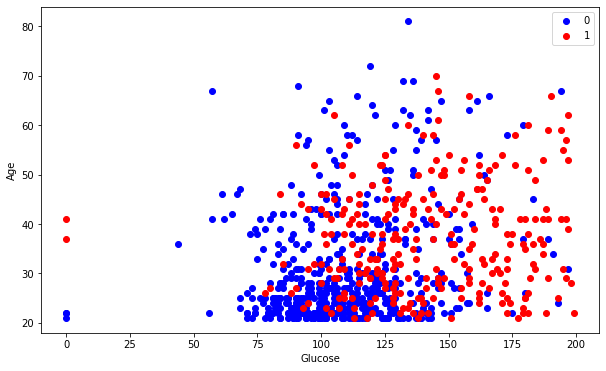

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='b', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r', label='1')
plt.xlabel('Glucose')
plt.ylabel('Age') 
plt.legend()

In [24]:
class LogisticRegression:
    
    def __init__(self, l_rate=0.01, iterations=2000): 
        self.l_rate = l_rate  
        self.iterations = iterations  

    def fit(self, x, y):  
        self.losses = [] 
        self.theta = np.zeros((1 + x.shape[1]))   
        n = x.shape[0]  
        
        for i in range(self.iterations):
            #Step1
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])  
            z = y_pred
            #Step2
            g_z =  1 / (1 + np.e**(-z))       
            
            #Step3
            cost = (-y * np.log(g_z) - (1 - y) * np.log(1 - g_z))/ n 
            self.losses.append(cost) 
            
            #Step4
            d_theta1 = (1/n) * np.dot(x.T, (g_z - y)) 
            d_theta0 = (1/n) * np.sum(g_z - y)  
              #Step5
            self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1  
            self.theta[0] = self.theta[0] - self.l_rate * d_theta0       
     
        return self
    
    
    def predict(self, x):  
        y_pred = self.theta[0] + np.dot(x, self.theta[1:]) 
        z = y_pred
        g_z = 1 / (1 + np.e**(-z))
        return [1 if i > 0.5 else 0 for i in g_z]   
   

In [25]:

def scale(x):
    x_scaled = x - np.mean(x, axis=0)
    x_scaled = x_scaled / np.std(x_scaled, axis=0)
    return x_scaled

In [26]:
x_sd= scale(x)  
model = LogisticRegression()
model.fit(x_sd, y)

In [27]:

print("theta_0= ", model.theta[0])
print("theta_1= ", model.theta[1])
print("theta_2= ", model.theta[2])

theta_0=  -0.7340253493951526
theta_1=  1.0535675928553723
theta_2=  0.3036809013437179


In [28]:
y_pred = model.predict(x_sd)

In [29]:

CM = confusion_matrix(y_pred, y, labels=[1,0])
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[129  62]
 [139 438]]


In [30]:
TP=CM[0][0]
FP=CM[0][1]
FN=CM[1][0]
TN=CM[1][1]

In [23]:
ACC = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy is : \n', ACC)
print('--------------------------------')
Rec = TP/(TP+FN)
print('Recall is : \n', Rec)
print('--------------------------------')
Prec = TP/(TP+FP)
print('Precsion is : \n', Prec)
print('--------------------------------')
F1 = 2 * ((Prec * Rec)/(Prec + Rec))
print('F1 score is : \n', F1)
print('--------------------------------')

Accuracy is : 
 0.7434895833333334
--------------------------------
Recall is : 
 0.5223880597014925
--------------------------------
Precsion is : 
 0.6698564593301436
--------------------------------
F1 score is : 
 0.5870020964360587
--------------------------------
